# Pristine GRAPE calculation of control fields for cnot implementation

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np

In [34]:
from qutip import *
from qutip.control import *

In [35]:
T = 2 * np.pi 
times = np.linspace(0, T, 500)

In [142]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

"""
    Class for representing the result of a GRAPE simulation.

    Attributes
    ----------
    u : array
        GRAPE control pulse matrix.

    H_t : time-dependent Hamiltonian
        The time-dependent Hamiltonian that realize the GRAPE pulse sequence.

    U_f : Qobj
        The final unitary transformation that is realized by the evolution
        of the system with the GRAPE generated pulse sequences.
    
    """

In [36]:
U = sigmax()
R = 500
H_ops = [sigmay()]
H_labels = [r'$u_{y}$']

$U = \sigma_{x} $   
$H_{ops} = [\sigma_{y} ] $


In [37]:
omega_1 = 0.5
H0 =  omega_1 * sigmaz()

c_ops = []

# GRAPE

In [38]:
from qutip.control.grape import plot_grape_control_fields, _overlap, grape_unitary_adaptive, cy_grape_unitary

In [39]:
from scipy.interpolate import interp1d
from qutip.ui.progressbar import TextProgressBar

In [40]:
u0 = np.array([np.random.rand(len(times)) * 2 * np.pi * 0.05 for _ in range(len(H_ops))])

u0 = [np.convolve(np.ones(10)/10, u0[idx,:], mode='same') for idx in range(len(H_ops))]

u_limits = None #[0, 1 * 2 * pi]
alpha = None

In [41]:
result = cy_grape_unitary(U, H0, H_ops, R, times, u_start=u0, u_limits=u_limits,
                          eps=2*np.pi*1, alpha=alpha, phase_sensitive=False,
                          progress_bar=TextProgressBar())

10.0%. Run time:  44.15s. Est. time left: 00:00:06:37
20.0%. Run time:  86.51s. Est. time left: 00:00:05:46
30.0%. Run time: 128.07s. Est. time left: 00:00:04:58
40.0%. Run time: 171.82s. Est. time left: 00:00:04:17
50.0%. Run time: 213.41s. Est. time left: 00:00:03:33
60.0%. Run time: 255.96s. Est. time left: 00:00:02:50
70.0%. Run time: 299.02s. Est. time left: 00:00:02:08
80.0%. Run time: 341.06s. Est. time left: 00:00:01:25
90.0%. Run time: 382.09s. Est. time left: 00:00:00:42
Total run time: 422.53s


## Plot control fields for cnot gate in the presense of single-qubit tunnelling

plot_grape_control_fields(times, u, labels, uniform_axes=False):
    """
    Plot a series of plots showing the GRAPE control fields given in the
    given control pulse matrix u.

    Parameters
    ----------
    times : array
        Time coordinate array.

    u : array
        Control pulse matrix.

    labels : list
        List of labels for each control pulse sequence in the control pulse
        matrix.

    uniform_axes : bool
        Whether or not to plot all pulse sequences using the same y-axis scale.
    
    """

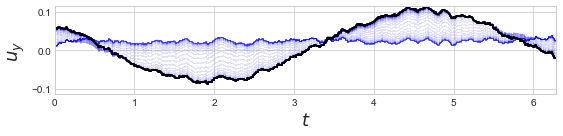

In [42]:
plot_grape_control_fields(times,
                          result.u / (2 * np.pi), H_labels, uniform_axes=True);

## Fidelity/overlap

In [43]:
U

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [44]:
result.U_f

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 7.67174681e-16+2.14672030e-17j  4.97753226e-16-1.00000000e+00j]
 [ 7.41953393e-17-1.00000000e+00j -5.92646930e-16-3.34801631e-16j]]

In [45]:
result.U_f/1j

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0. -1.]
 [-1.  0.]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a15778cc0>)

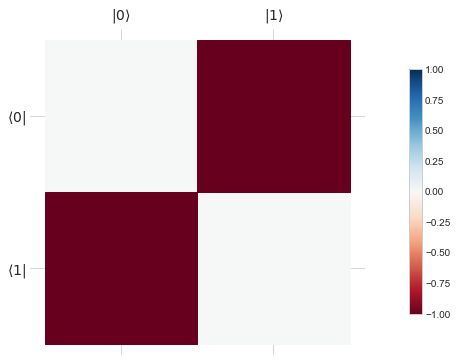

In [46]:
hinton(result.U_f/1j)

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a157bdbe0>)

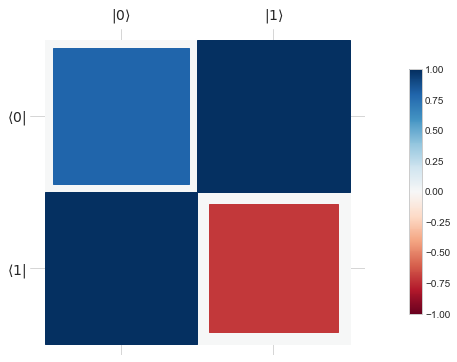

In [47]:
hinton(result.U_f)

In [48]:
result.H_t[0]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.5  0. ]
 [ 0.  -0.5]]

In [49]:
result.H_t[1]

[Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.+0.j 0.-1.j]
  [0.+1.j 0.+0.j]],
 array([ 0.36343123,  0.36087463,  0.35468705,  0.37502843,  0.38489184,
         0.3812145 ,  0.35968703,  0.37323339,  0.36125918,  0.34885048,
         0.3548945 ,  0.36666447,  0.37802628,  0.35323429,  0.33913675,
         0.32673345,  0.33060962,  0.30623606,  0.30310382,  0.3161601 ,
         0.29755848,  0.28033645,  0.27878876,  0.28570362,  0.27772505,
         0.28853517,  0.25276866,  0.26121285,  0.26157663,  0.24666244,
         0.25024423,  0.24207515,  0.22960474,  0.21547174,  0.2211422 ,
         0.19341229,  0.19825187,  0.18082503,  0.16728245,  0.15420372,
         0.13837435,  0.11982971,  0.10543622,  0.08832197,  0.05542073,
         0.07131188,  0.07688305,  0.06286033,  0.06224014,  0.06010421,
         0.03041083,  0.02749265,  0.0240883 ,  0.02439677,  0.04133374,
         0.02561522, -0.00310302, -0.01834338, -0.05643079, -0.0558

In [50]:
result.u

array([[[ 0.07306086,  0.07819237,  0.07974008, ...,  0.19695765,
          0.16699535,  0.15472806]],

       [[ 0.07308664,  0.07821569,  0.07976093, ...,  0.19693186,
          0.1669671 ,  0.1669671 ]],

       [[ 0.07312354,  0.07824906,  0.07979077, ...,  0.19689496,
          0.16692669,  0.16692669]],

       ...,

       [[ 0.36343123,  0.36087463,  0.35468705, ..., -0.09341405,
         -0.13101461, -0.13101461]],

       [[ 0.36343123,  0.36087463,  0.35468705, ..., -0.09341405,
         -0.13101461, -0.13101461]],

       [[ 0.36343123,  0.36087463,  0.35468705, ..., -0.09341405,
         -0.13101461, -0.13101461]]])

## Test numerical integration of GRAPE pulse

In [51]:
U_f_numerical = propagator(
    result.H_t, times[-1], [], options=Odeoptions(nsteps=5000), args={})
U_f_numerical

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[-0.74014033+0.54460277j  0.39445101+0.00291764j]
 [-0.39445101+0.00291764j -0.74014033-0.54460277j]]

In [52]:
U_f_numerical / U_f_numerical[0,0]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 1.        +0.j         -0.34386569-0.25696187j]
 [ 0.3476292 +0.25184709j  0.29750778+0.95471939j]]

In [53]:
_overlap(result.U_f, U_f_numerical).real, abs(_overlap(result.U_f, U_f_numerical))**2

(-0.0029176384271234856, 8.512613991427607e-06)

# Imports

Need to have jate.py in your folder

In [54]:
%run jate.py #will import everything

<Figure size 432x288 with 0 Axes>

## My code 

## Building parts

### Building the things to be calculated only once

In [55]:
def maker(omega_1, H_0, H_1, T_s, Lin, d=2, gamma=0.1):
    r"""maker
    Makes all the things that remain constant throught the program, but are 
    repeatedly used.
    

    Parameters
    ----------
    omega_1 : float
              frequency corresponding to half of the difference between 
              energy levels of the qubit
              
    H_0     : Qobj
              Bare Hamiltonian 
              
    H_1     : Qobj
              Interaction Hamiltonian 
              
    T_s     : Qobj
              Unitary to be implemented in the Hilbert space
    
    Lin     : Qobj
              Linbladian operators

    d       : int
              Dimension of the matrix. Defaults to 2
    
    gamma   : float
              Damping constantof the Linbladian

    
    Returns
    -------
    
    ih0     : Qobj
              $I\otimes H_{0}$
              
    ih1     : Qobj
              $I\otimes H_{1}$

    h0ci    : Qobj
              $H_{0}^{*}\otimes I $

    h1ci    : Qobj
              $H_{1}^{*}\otimes I $

    T       : Qobj
              Target unitary transformed to the Liouville space

    linbladian : Qobj
                 The full lindbladian term as it appears on transformation to 
                 the Liouville space.
        
    """
    I = identity(d)
    L_I = tensor(I, I)
    ih0 = tensor(I, H_0) 
    ih1 = tensor(I, H_1) 
    h0ci = tensor(H_0.conj(), I) 
    h1ci = tensor(H_1.conj(), I)
    x_k = ih1 - h1ci
    term1 = tensor(Lin.trans(), Lin)
    term2 = tensor(I, ((Lin.dag())*(Lin)))
    term3 = tensor(((Lin.trans())*(Lin.conj())), I)
    lindbladian = 1j*(gamma)*(term1 - 0.5*(term2 + term3))
    T = tensor(T_s.trans(), T_s) # Transforming $T_{s}$ to liouville space
    
    
    return ih0, ih1, h0ci, h1ci, x_k, lindbladian, T, L_I

In [80]:
omega_1 = 0.5
H_0 = omega_1*sigmaz() 
H_1 = sigmay()
T_s = sigmax() 
Lin = sigmaz()
ih0, ih1, h0ci, h1ci, x_k, lindbladian, T, L_I  = maker(omega_1,
                                                  H_0, H_1, T_s, 
                                                  Lin, d=2, gamma=0.0)

In [81]:
L_I

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

### Building $A(t)$

In [82]:
def A(xi):
    r"""making $A(t)$"""
    A = ih0 - h0ci + xi*(ih1 - h1ci) + lindbladian
    return A

In [83]:
A(0.5)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.+0.j   0.-0.5j  0.-0.5j  0.+0.j ]
 [ 0.+0.5j -1.+0.j   0.+0.j   0.-0.5j]
 [ 0.+0.5j  0.+0.j   1.+0.j   0.-0.5j]
 [ 0.+0.j   0.+0.5j  0.+0.5j  0.+0.j ]]

### Building $L(t)$ and the Identity in the Liouville space

In [84]:
def L(xi, dt):
    r"""Making $L(t) from $A(t)$"""
    L = (-1j*A(xi)*dt).expm()
    return L

In [85]:
L(0.5, 0.001)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.99999750e-01+0.00000000e+00j -4.99999833e-04-2.49999958e-07j
  -4.99999833e-04+2.49999958e-07j  2.49999958e-07+0.00000000e+00j]
 [ 4.99999833e-04+2.49999958e-07j  9.99999250e-01+9.99999667e-04j
  -2.49999958e-07+0.00000000e+00j -4.99999833e-04-2.49999958e-07j]
 [ 4.99999833e-04-2.49999958e-07j -2.49999958e-07+0.00000000e+00j
   9.99999250e-01-9.99999667e-04j -4.99999833e-04+2.49999958e-07j]
 [ 2.49999958e-07+0.00000000e+00j  4.99999833e-04+2.49999958e-07j
   4.99999833e-04-2.49999958e-07j  9.99999750e-01+0.00000000e+00j]]

## Major functions

### Major functions 1

In [86]:
# building the function to optimize (optimizee)
def L_vec(xi_vec, dt):
    r"""Building the vector of differential $L(t)$"""
    L_vec = [L(xi, dt) for xi in xi_vec] 
    return L_vec

In [87]:
def fidelity_calc(A, B):
    r"""Making a generalised fidelity function"""
    first_part = (A - B).dag()
    second_part = (A - B)
    f_int = (first_part* second_part)
    f = f_int.tr()
    return f

In [88]:
def L_full_maker(xi_vec, dt):
    r"""Building the $L(t)$ for the total time $t$"""
    xi_vec_size = xi_vec.size # finding the size of xi
    L_full = L_I # Identity for the for loop of L
    L_v = L_vec(xi_vec, dt) # calling L_vec
    for i in range(xi_vec_size): # generating L_full
        L_full = L_full*L_v[xi_vec_size - 1 - i]
    return L_full

In [89]:
def F(xi_vec, dt):
    r"""Using the fidelity metric to find out the closeness between $T$
    and $L(t)$"""
    L_full = L_full_maker(xi_vec, dt)
    F = real(-fidelity_calc(T, L_full))   
    return F

### Testing major functions 1

In [90]:
fidelity_calc(sigmax(), sigmay())

4.0

In [91]:
fidelity_calc(sigmay(), sigmay())

0.0

In [92]:
xi_vec_test = array([1.0, 2.0])
xi_vec_test

array([1., 2.])

In [93]:
xi_vec_test.size

2

In [94]:
w_vec = [xi**2 for xi in xi_vec_test]
w_vec

[1.0, 4.0]

In [95]:
# F(xi_vec, dt)
F(xi_vec_test, 0.001)

-7.999999999998001

In [96]:
L_v = L_vec(xi_vec_test, 0.001)

In [97]:
L_v

[Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
 Qobj data =
 [[ 9.99999000e-01+0.00000000e+00j -9.99999167e-04-4.99999792e-07j
   -9.99999167e-04+4.99999792e-07j  9.99999583e-07+0.00000000e+00j]
  [ 9.99999167e-04+4.99999792e-07j  9.99998500e-01+9.99999167e-04j
   -9.99999583e-07+0.00000000e+00j -9.99999167e-04-4.99999792e-07j]
  [ 9.99999167e-04-4.99999792e-07j -9.99999583e-07+0.00000000e+00j
    9.99998500e-01-9.99999167e-04j -9.99999167e-04+4.99999792e-07j]
  [ 9.99999583e-07+0.00000000e+00j  9.99999167e-04+4.99999792e-07j
    9.99999167e-04-4.99999792e-07j  9.99999000e-01+0.00000000e+00j]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
 Qobj data =
 [[ 9.99996000e-01+0.00000000e+00j -1.99999433e-03-9.99998583e-07j
   -1.99999433e-03+9.99998583e-07j  3.99999433e-06+0.00000000e+00j]
  [ 1.99999433e-03+9.99998583e-07j  9.99995500e-01+9.99997167e-04j
   -3.99999433e-06+0.00000000e+00j -1.99999433e-03-9.99998

### Major Functions 2

In [98]:
def L_comma_k_maker(xi_vec, k, dt):
    r"""Making of the derivative of full $L(t)$ at time $t_{k}$"""
    N = xi_vec.size 
    # Determining the size of xi, and thus the time_steps indirectly.
    L_v = L_vec(xi_vec, dt)# Making of the full $L(t)$
    inner_part = L_I # Beginner for the for loop
    for i in range(N):
        if i == ( N - 1 - k ):
            # The step at which $X_{k}(t)$ has to be inserted 
            inner_part = inner_part*x_k*L_v[k - 1]
        else:
            # Usual multiplications of $L_{k}$
            inner_part = inner_part*L_v[N - 1 - i]
    l_comma_k = inner_part
    return l_comma_k
    

In [99]:
# L_comma_k_maker(xi_vec, k, dt)
L_comma_k_maker(xi_vec_test, 2, 0.001)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.99991000e-01+0.00000000e+00j -2.99997950e-03-3.49998654e-06j
  -2.99997950e-03+3.49998654e-06j  8.99997025e-06+0.00000000e+00j]
 [ 2.99998050e-03+2.49999246e-06j  9.99989000e-01+1.99998633e-03j
  -8.99996975e-06+2.99999225e-09j -2.99998050e-03-2.49999246e-06j]
 [ 2.99998050e-03-2.49999246e-06j -8.99996975e-06-2.99999225e-09j
   9.99989000e-01-1.99998633e-03j -2.99998050e-03+2.49999246e-06j]
 [ 8.99997025e-06+0.00000000e+00j  2.99997950e-03+3.49998654e-06j
   2.99997950e-03-3.49998654e-06j  9.99991000e-01+0.00000000e+00j]]

In [100]:
def updater(xi_vec, dt, epsilon):
    r"""Implementing the GRAPE update step"""
    xi_vec_size = xi_vec.size # finding the size of xi
    L_full = L_full_maker(xi_vec, dt)
    di = []
    for k in range(xi_vec_size):
        # Building the thing to be added to the old function
        L_comma_k = L_comma_k_maker(xi_vec, k, dt)
        differentiated = T - L_comma_k
        plain = T - L_full
        c = -differentiated.dag()*plain
        d = -plain.dag()*differentiated
        inside = c.tr() + d.tr()
        di.append(epsilon*inside)

    diff = array(di)
    xi_new_vec = xi_vec + diff
    return diff, xi_new_vec
    

In [101]:
#  updater(xi_vec, dt, epsilon)
updater(xi_vec_test, 0.001, 0.001)

(array([-0.008+0.j, -0.008+0.j]), array([0.992+0.j, 1.992+0.j]))

In [102]:
def terminator(max_iter, time_steps, total_time, epsilon):
    r"""Brief description of the function"""
    
    xi_initial =  1000*random_sample((time_steps,))
    dt = total_time/time_steps
    xi_diff, xi_new_vec = updater(xi_initial, dt, epsilon)
    
    for i in range(max_iter):
        if amax(xi_diff) < epsilon**2 :
            
            xi_final = xi_new_vec
            break
        else :
            xi_diff, xi_new_vec = updater(xi_new_vec, dt, epsilon)
            print(i)
            print(amax(xi_diff))
            
        
    xi_final = xi_new_vec    
    return xi_final

# Running stuff

### qutip grape

In [103]:
xi_qutip = result.u

In [113]:
len(xi_qutip)

500

In [119]:
xi_qutip.shape

(500, 1, 500)

In [121]:
xi_qutip.size

250000

In [122]:
len(xi_qutip[0])

1

In [123]:
len(xi_qutip[1])

1

In [124]:
len(xi_qutip[2])

1

In [127]:
len(xi_qutip[0][0])

500

In [130]:
len(xi_qutip[1][0])

500

In [130]:
len(xi_qutip[1][0])

500

In [131]:
len(xi_qutip[250][0])

500

In [132]:
len(xi_qutip[250,0,:])

500

In [134]:
len(xi_qutip[250,1,:])

IndexError: index 1 is out of bounds for axis 1 with size 1

In [133]:
len(xi_qutip[-1,0,:])

500

In [129]:
xi_qutip[0][0][1]

0.07819237012052123

In [114]:
xi_qutip

array([[[ 0.07306086,  0.07819237,  0.07974008, ...,  0.19695765,
          0.16699535,  0.15472806]],

       [[ 0.07308664,  0.07821569,  0.07976093, ...,  0.19693186,
          0.1669671 ,  0.1669671 ]],

       [[ 0.07312354,  0.07824906,  0.07979077, ...,  0.19689496,
          0.16692669,  0.16692669]],

       ...,

       [[ 0.36343123,  0.36087463,  0.35468705, ..., -0.09341405,
         -0.13101461, -0.13101461]],

       [[ 0.36343123,  0.36087463,  0.35468705, ..., -0.09341405,
         -0.13101461, -0.13101461]],

       [[ 0.36343123,  0.36087463,  0.35468705, ..., -0.09341405,
         -0.13101461, -0.13101461]]])

In [136]:
xi_qutip[-1,0, :]

array([ 0.36343123,  0.36087463,  0.35468705,  0.37502843,  0.38489184,
        0.3812145 ,  0.35968703,  0.37323339,  0.36125918,  0.34885048,
        0.3548945 ,  0.36666447,  0.37802628,  0.35323429,  0.33913675,
        0.32673345,  0.33060962,  0.30623606,  0.30310382,  0.3161601 ,
        0.29755848,  0.28033645,  0.27878876,  0.28570362,  0.27772505,
        0.28853517,  0.25276866,  0.26121285,  0.26157663,  0.24666244,
        0.25024423,  0.24207515,  0.22960474,  0.21547174,  0.2211422 ,
        0.19341229,  0.19825187,  0.18082503,  0.16728245,  0.15420372,
        0.13837435,  0.11982971,  0.10543622,  0.08832197,  0.05542073,
        0.07131188,  0.07688305,  0.06286033,  0.06224014,  0.06010421,
        0.03041083,  0.02749265,  0.0240883 ,  0.02439677,  0.04133374,
        0.02561522, -0.00310302, -0.01834338, -0.05643079, -0.05587424,
       -0.04136481, -0.05149552, -0.05496803, -0.0659153 , -0.09300346,
       -0.10721999, -0.09270396, -0.09495942, -0.10227233, -0.11

In [137]:
#L_full_maker(xi_qutip, dt)
L_full_maker(xi_qutip[-1, 0, :], dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.96135485+0.j          0.14082938-0.13160086j  0.14082938+0.13160086j
   0.03864515+0.j        ]
 [ 0.12792762+0.14417429j -0.95715579-0.0897549j  -0.00099598+0.03863231j
  -0.12792762-0.14417429j]
 [ 0.12792762-0.14417429j -0.00099598-0.03863231j -0.95715579+0.0897549j
  -0.12792762+0.14417429j]
 [ 0.03864515+0.j         -0.14082938+0.13160086j -0.14082938-0.13160086j
   0.96135485+0.j        ]]

In [143]:
2 * np.pi/500

0.012566370614359173

In [145]:
#L_full_maker(xi_qutip, dt)
blah = L_full_maker(xi_qutip[-1, 0, :], (2 * np.pi/500))
blah

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 3.51636624e-05+0.00000000e+00j  4.54878726e-03+3.80407155e-03j
   4.54878726e-03-3.80407155e-03j  9.99964836e-01+0.00000000e+00j]
 [ 4.50208265e-03+3.85923279e-03j -5.79842243e-06-3.46822930e-05j
   9.99890554e-01+1.21882754e-02j -4.50208265e-03-3.85923279e-03j]
 [ 4.50208265e-03-3.85923279e-03j  9.99890554e-01-1.21882754e-02j
  -5.79842243e-06+3.46822930e-05j -4.50208265e-03+3.85923279e-03j]
 [ 9.99964836e-01+0.00000000e+00j -4.54878726e-03-3.80407155e-03j
  -4.54878726e-03+3.80407155e-03j  3.51636624e-05+0.00000000e+00j]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1717bda0>)

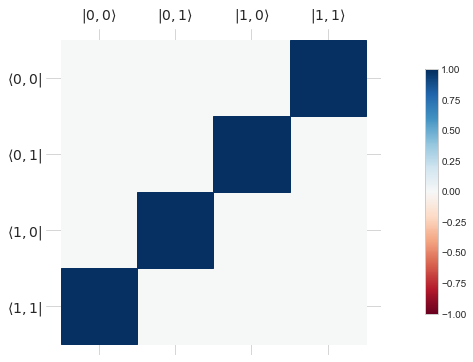

In [139]:
hinton(T)

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a17b10208>)

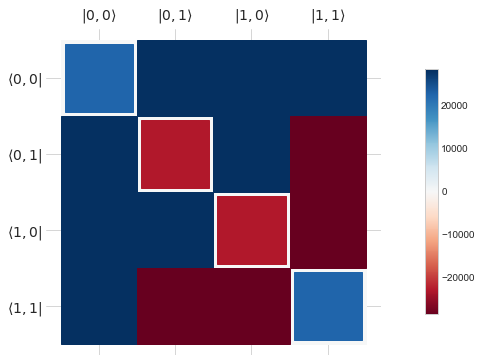

In [151]:
hinton(blah/blah[0,0])

(<Figure size 432x288 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x1a1715d908>)

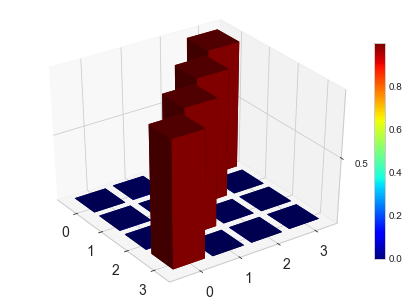

In [149]:
matrix_histogram(blah)

(<Figure size 432x288 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x1a17b95588>)

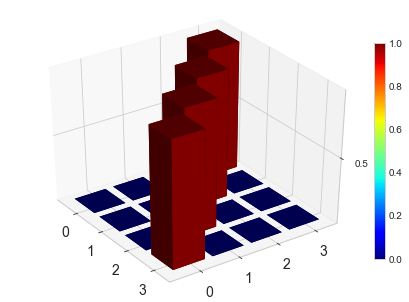

In [150]:
matrix_histogram(T)

In [140]:
T_s

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [141]:
F(xi_qutip[-1, 0, :], dt)

-7.849403337324857

In [148]:
F(xi_qutip[-1, 0, :], (2*np.pi/500))

-0.0005784388991306006

### Try1

In [104]:
total_time = pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a17010a58>)

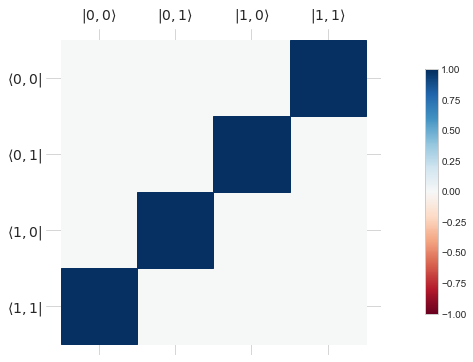

In [105]:
hinton(T)

In [106]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([677.35845317+0.j, 798.11800551+0.j, 881.88119845+0.j,
        28.37897987+0.j, 370.96641791+0.j, 652.47408513+0.j,
       690.91298617+0.j, 625.63186372+0.j, 364.41946052+0.j,
       313.83645322+0.j, 871.96106148+0.j, 765.75665394+0.j,
       429.23857023+0.j, 937.86106005+0.j, 885.07914586+0.j,
       122.63126095+0.j, 754.55897974+0.j, 690.16014984+0.j,
       449.67595937+0.j,  77.994341  +0.j])

In [107]:
F(xi_opt, dt)

-7.999719311146443

In [108]:
max_iter

10

In [109]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [110]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.88644004+0.j          0.31724527+0.00441918j  0.31724527-0.00441918j
   0.11355996+0.j        ]
 [-0.31720457+0.00673453j  0.88641643-0.00646984j -0.11348978+0.00399156j
   0.31720457-0.00673453j]
 [-0.31720457-0.00673453j -0.11348978-0.00399156j  0.88641643+0.00646984j
   0.31720457+0.00673453j]
 [ 0.11355996+0.j         -0.31724527-0.00441918j -0.31724527+0.00441918j
   0.88644004+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1709e630>)

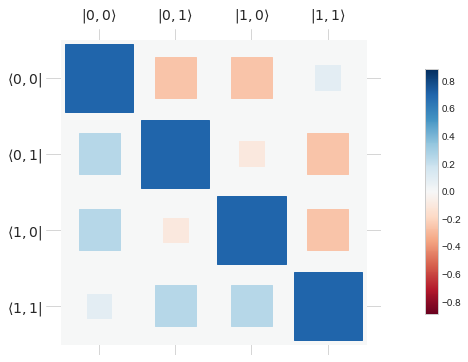

In [111]:
hinton(L_full_maker(xi_opt, dt))